### Importing Packages

In [1]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Appending of stopwords
Additional words which does not add value to the analysis has been added into the list of stop words too

In [2]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append("product")
stop_words.append('products')
stop_words.append('items')
stop_words.append("item")
stop_words.append("garnier")
stop_words.append("skin")
stop_words.append("micellar")
stop_words.append("hair")
stop_words.append("makeup")
stop_words.append("love")
stop_words.append("water")
stop_words.append("face")
stop_words.append("use")
stop_words.append("thank")
stop_words.append("thanks")
stop_words.append("order")
stop_words.append("eye")
stop_words.append("remover")
stop_words.append("mask")
stop_words.append("foundation")
stop_words.append("purchase")
stop_words.append('lip')
stop_words.append('lipstick')
stop_words.append('buy')
stop_words.append('use')
stop_words.append('delivery')
stop_words.append('mascara')
# stop_words.append('seller')

### Functions for dfferent preprocessing steps

In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['ADJ', 'NOUN','VERB','ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [4]:
data_file = "Data/all_data_clean_nonsplit.csv"
df = pd.read_csv(data_file)
df = df[df["Platform"] == 'Lazada']

#removing of some reviews which does not have any meaning
df = df[df["Review_clean"] != "no comments review is an image" ]
df = df[df["Review_clean"] != "no review receive" ]
df = df[df["Review_clean"] != "your review has been hidden due to inappropriate content note hope may remove the coins awarded for this review" ]

1327


,Unnamed: 0,Platform,Brand,Category,Product Name,Price,Reviewer,Review,Review_clean,Product Purchase,Ratings,Date Of Review,Response
2723,2723,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris EverStrong Thickening Shampoo,11.93,Karen T.,item leaking on arrival but store arranged for...,item leaking on arrival but store arranged for...,Volume (ml):250,5.0,2020-03-13 00:00:00,yes
2724,2724,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Color Vive Shampoo 450ml,8.93,Lazada Customer,love this product! the sellers even add in som...,love this product the sellers even add in some...,Volume (ml):450,5.0,2020-03-13 00:00:00,yes
2725,2725,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Elseve Hyaluron Moisture Shampoo...,10.43,Lazada Customer,"ordered on 26 apr, contacted seller many times...",ordered on 26 apr contacted seller many times ...,Volume (ml):700,1.0,2020-03-13 00:00:00,no
2726,2726,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Total Repair 5 Repairing Shampoo...,7.43,khjchm,gd quality. thanks l'oreal,gd quality thanks lorean,Volume (ml):330,5.0,2020-03-13 00:00:00,yes
2727,2727,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Total Repair 5 Repairing Shampoo...,7.43,khjchm,good buy. thanks l'oreal,good buy thanks lorean,Volume (ml):330,5.0,2020-03-13 00:00:00,yes
2728,2728,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Total Repair 5 Repairing Shampoo...,7.43,Lazada Customer,wrong items were sent and the items had to be ...,wrong items were sent and the items had to be ...,Volume (ml):330,1.0,2020-03-13 00:00:00,no
2729,2729,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Fall Resist 3X Anti-Hair Fall Sh...,10.43,khjchm,best buy. thanks l'oreal,best buy thanks lorean,Volume (ml):650,5.0,2020-03-13 00:00:00,yes
2730,2730,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Fall Resist 3X Anti-Hair Fall Sh...,10.43,Ding J.,"like this shampoo, got it on discount price ch...",like this shampoo got it on discount price che...,Volume (ml):650,5.0,2020-03-13 00:00:00,yes
2731,2731,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Fall Resist 3X Anti-Hair Fall Sh...,10.43,Catherine L.,not suitable to my hair so can’t comment more....,not suitable to my hair so can t comment more ...,Volume (ml):650,1.0,2020-03-13 00:00:00,no
2732,2732,Lazada,L-oreal-Paris,Shampoo,L'Oreal Paris Fall Resist 3X Anti-Hair Fall Sh...,10.43,Rosa O.,received in 2 days! i think it is cheaper than...,received in 2 days i think it is cheaper than ...,Volume (ml):650,5.0,2020-03-13 00:00:00,no


In [5]:
data = df.Review_clean.values.tolist()
data_words = list(sent_to_words(data))

#Removing of stopwords
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams      
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['ADJ', 'NOUN'])

1327


C:\Users\User\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### LDA Model

In [6]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

### Getting the optimal number of topics
Applying the LDA model to different number to get the optimal number of topics based on the coherence score

In [7]:
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=100,
                                           alpha=1, 
                                            eta = 0.01,
                                            per_word_topics = True)
    
    coherencemodel = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_model)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()) + " " + str(lda_model.log_perplexity(corpus)))

print(datetime.datetime.now())

2020-03-25 13:41:23.352926


C:\Users\User\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


#Topics: 2 Score: 0.3473763856531047 -7.076989401733996
#Topics: 3 Score: 0.3257401935711633 -7.0673216952534625
#Topics: 4 Score: 0.3510900017684856 -7.063999973505691
#Topics: 5 Score: 0.3823629410264333 -7.082124849036528
#Topics: 6 Score: 0.4058049429666453 -7.0778651289213865
#Topics: 7 Score: 0.39806083052069174 -7.0781456687071715
#Topics: 8 Score: 0.3956886597498939 -7.102698548639111
#Topics: 9 Score: 0.38624286668658053 -7.093011125671142
2020-03-25 14:03:17.883286


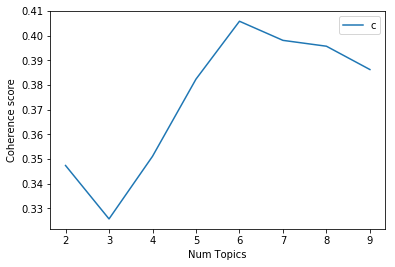

In [8]:
import matplotlib.pyplot as plt

limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('topic_coherence_lazada.png')
plt.show()


### Results obtain by LDA model

In [12]:
lda_model = model_list[2]
pprint(lda_model.print_topics(num_words = 15))

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis
# pyLDAvis.save_html(vis, 'lda_5topic_lazada.html')

[(0,
  '0.054*"oil" + 0.047*"day" + 0.033*"time" + 0.031*"dry" + 0.030*"great" + '
  '0.021*"much" + 0.020*"bit" + 0.018*"long" + 0.017*"amazing" + 0.017*"lot" + '
  '0.017*"last" + 0.015*"shade" + 0.013*"work" + 0.012*"coverage" + '
  '0.011*"end"'),
 (1,
  '0.200*"good" + 0.048*"nice" + 0.037*"condition" + 0.034*"free" + '
  '0.029*"fast" + 0.028*"price" + 0.023*"seller" + 0.019*"little" + '
  '0.017*"cheap" + 0.015*"sale" + 0.014*"worth" + 0.014*"effect" + '
  '0.013*"result" + 0.011*"perfect" + 0.010*"packaging"'),
 (2,
  '0.067*"easy" + 0.045*"colour" + 0.032*"touch" + 0.031*"color" + '
  '0.025*"hour" + 0.022*"powder" + 0.019*"apply" + 0.018*"light" + '
  '0.017*"coverage" + 0.016*"cakey" + 0.016*"spray" + 0.016*"oily" + '
  '0.015*"cover" + 0.014*"able" + 0.014*"concealer"'),
 (3,
  '0.047*"smooth" + 0.029*"sensitive" + 0.027*"week" + 0.026*"smell" + '
  '0.025*"dry" + 0.021*"suitable" + 0.020*"hydrated" + 0.020*"clean" + '
  '0.018*"frizzy" + 0.018*"serum" + 0.017*"gentle" + 0.

C:\Users\User\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.067719  0.050315       1        1  22.660200
0      0.169917 -0.069180       2        1  21.862429
2      0.129013 -0.262615       3        1  19.795383
3      0.043992  0.347126       4        1  18.628891
1     -0.410641 -0.065647       5        1  17.053104, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
17    Default  340.000000          good  340.000000  30.0000  30.0000
174   Default  120.000000          easy  120.000000  29.0000  29.0000
43    Default  205.000000           day  205.000000  28.0000  28.0000
105   Default   85.000000        smooth   85.000000  27.0000  27.0000
82    Default   80.000000          nice   80.000000  26.0000  26.0000
72    Default  134.000000           oil  134.000000  25.0000  25.0000
226   Default   99.000000        colour   99.000000  24.0000  24.0000
74    Default   57.000000     condition   57.000000  23.0000  23.0000
181   Default   58.000000         touch   58.000000  22.0000  22.0000
355   Default   56.000000         color   56.000000  21.0000  21.0000
211   Default   56.000000         brand   56.000000  20.0000  20.0000
107   Default   46.000000          fast   46.000000  19.0000  19.0000
75    Default   61.000000          free   61.000000  18.0000  18.0000
30    Default   45.000000          week   45.000000  17.0000  17.0000
558   Default   61.000000     sensitive   61.000000  16.0000  16.0000
279   Default   46.000000          hour   46.000000  15.0000  15.0000
108   Default  126.000000           dry  126.000000  14.0000  14.0000
35    Default   51.000000         price   51.000000  13.0000  13.0000
101   Default   48.000000         smell   48.000000  12.0000  12.0000
151   Default   82.000000         light   82.000000  11.0000  11.0000
3     Default   44.000000        bottle   44.000000  10.0000  10.0000
5     Default   36.000000        seller   36.000000   9.0000   9.0000
687   Default   40.000000        powder   40.000000   8.0000   8.0000
178   Default   40.000000           bit   40.000000   7.0000   7.0000
41    Default   35.000000      suitable   35.000000   6.0000   6.0000
13    Default   88.000000          time   88.000000   5.0000   5.0000
182   Default   59.000000   application   59.000000   4.0000   4.0000
615   Default   33.000000      hydrated   33.000000   3.0000   3.0000
555   Default   33.000000         clean   33.000000   2.0000   2.0000
145   Default   34.000000         apply   34.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
1191   Topic5    9.395882    waterproof    9.435991   1.7646  -5.1137
359    Topic5    9.395058  moisturising    9.436063   1.7645  -5.1138
97     Topic5    9.394224         stock    9.436114   1.7644  -5.1139
76     Topic5    8.457232          gift    8.497340   1.7641  -5.2190
553    Topic5    8.457225        prompt    8.497341   1.7641  -5.2190
59     Topic5    8.457210          deal    8.497343   1.7641  -5.2190
29     Topic5   10.321397       service   10.375577   1.7636  -5.0198
755    Topic5    7.518582         trial    7.558689   1.7635  -5.3366
157    Topic5    7.518582          heat    7.558689   1.7635  -5.3366
815    Topic5    7.518582           fit    7.558689   1.7635  -5.3366
420    Topic5    7.518583         usual    7.558691   1.7635  -5.3366
577    Topic5    7.518509         money    7.558698   1.7635  -5.3366
331    Topic5   28.994265        little   29.157764   1.7632  -3.9869
1055   Topic5    6.579934      envelope    6.620041   1.7628  -5.4700
814    Topic5    6.579866       compact    6.620046   1.7628  -5.4700
526    Topic5    6.574940  disappointed    6.620288   1.7620  -5.4707
239    Topic5   20.564091        result   20.708338   1.7618  -4.3304
760    Topic5    5.641284        period    5.681391   1.7618  -5.6239
9      To

### Get the dominant topic for each of the review

Look at the reviews and its respective dominant topic given by the LDA model to understand how the lda model classifiy the reviews and to better understand the topics and keyword generated by the lda model. After understanding this, we can better give a name/label to the topics generated

In [33]:
bow = [id2word.doc2bow(line) for line in texts] # get the bow-format lines with the set dictionary

review = []
topic = []
percentage = []
for line,bag in zip(data,bow):
    doc_topics = [(topic, prob) for topic,prob in lda_model.get_document_topics(bag)]
    doc_topics = sorted(doc_topics, key=lambda x: (x[1]), reverse=True)
#     print(doc_topics)
    dominant_topic = doc_topics[0][0]
    percen = doc_topics[0][1]
    review.append(line)
    topic.append(dominant_topic)
    percentage.append(percen)


keyword = []
for i in range(len(topic)):
    wp = lda_model.show_topic(topic[i])
    topic_keywords = ", ".join([word for word, prop in wp])
    keyword.append(topic_keywords)
    
df_topic = {'review': review,'keyword': keyword, "topic": topic, "percentage": percentage}
new_df = pd.DataFrame.from_dict(df_topic)


# new_df.to_csv('4topic_lazada.csv')
new_df

,review,keyword,topic,percentage
0,item leaking on arrival but store arranged for...,"day, time, good, touch, work, last, hour, powd...",3,0.428571
1,love this product the sellers even add in some...,"good, condit, color, price, smell, fast, free,...",1,0.375000
2,ordered on 26 apr contacted seller many times ...,"day, time, good, touch, work, last, hour, powd...",3,0.317339
3,gd quality thanks lorean,"oil, dri, easi, colour, long, appli, lot, appl...",0,0.250000
4,good buy thanks lorean,"good, condit, color, price, smell, fast, free,...",1,0.376306
5,wrong items were sent and the items had to be ...,"day, time, good, touch, work, last, hour, powd...",3,0.821473
6,best buy thanks lorean,"good, condit, color, price, smell, fast, free,...",1,0.376292
7,like this shampoo got it on discount price che...,"good, condit, color, price, smell, fast, free,...",1,0.441808
8,not suitable to my hair so can t comment more ...,"oil, dri, easi, colour, long, appli, lot, appl...",0,0.500000
9,received in 2 days i think it is cheaper than ...,"good, condit, color, price, smell, fast, free,...",1,0.479537
